In [1]:
import numpy as np
import pandas as pd

In [2]:
gt_df = pd.read_csv('/Users/jxhn/Desktop/IRONHACK/Week_5/Mid_bootcamp_project/Data/Raw/globalterrorismr.csv', encoding = 'ISO-8859-1')

/var/folders/h1/sm0yz6nx7m9cgsn8627qx6c00000gn/T/ipykernel_32542/2132931928.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  gt_df = pd.read_csv('/Users/jxhn/Desktop/IRONHACK/Week_5/Mid_bootcamp_project/Data/Raw/globalterrorismr.csv', encoding = 'ISO-8859-1')


In [3]:
gt_df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
slide1 = gt_df[['eventid', 'iyear','success','imonth', 'iday', 'country_txt','region_txt','suicide', 'attacktype1_txt', 'targtype1_txt', 'target1','nkill']]

In [5]:
#previous cell I have selected the columns I am using for the analysis

In [6]:
slide1.head()

,eventid,iyear,success,imonth,iday,country_txt,region_txt,suicide,attacktype1_txt,targtype1_txt,target1,nkill
0,197000000001,1970,1,7,2,Dominican Republic,Central America & Caribbean,0,Assassination,Private Citizens & Property,Julio Guzman,1.0
1,197000000002,1970,1,0,0,Mexico,North America,0,Hostage Taking (Kidnapping),Government (Diplomatic),"Nadine Chaval, daughter",0.0
2,197001000001,1970,1,1,0,Philippines,Southeast Asia,0,Assassination,Journalists & Media,Employee,1.0
3,197001000002,1970,1,1,0,Greece,Western Europe,0,Bombing/Explosion,Government (Diplomatic),U.S. Embassy,NaN
4,197001000003,1970,1,1,0,Japan,East Asia,0,Facility/Infrastructure Attack,Government (Diplomatic),U.S. Consulate,NaN


In [7]:
pd.set_option('display.max_rows', None) #want to use the whole dataframe

In [8]:
slide1.info() #taking a deeper look into things

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   eventid          181691 non-null  int64  
 1   iyear            181691 non-null  int64  
 2   success          181691 non-null  int64  
 3   imonth           181691 non-null  int64  
 4   iday             181691 non-null  int64  
 5   country_txt      181691 non-null  object 
 6   region_txt       181691 non-null  object 
 7   suicide          181691 non-null  int64  
 8   attacktype1_txt  181691 non-null  object 
 9   targtype1_txt    181691 non-null  object 
 10  target1          181053 non-null  object 
 11  nkill            171378 non-null  float64
dtypes: float64(1), int64(6), object(5)
memory usage: 16.6+ MB


In [9]:
slide1.isnull().sum() #missing values, target1 and nkill.

eventid                0
iyear                  0
success                0
imonth                 0
iday                   0
country_txt            0
region_txt             0
suicide                0
attacktype1_txt        0
targtype1_txt          0
target1              638
nkill              10313
dtype: int64

In [10]:
slide1.loc[:,'target1'] = slide1['target1'].fillna('Unknown') #replaced categorical values with unknown

In [11]:
slide1.loc[:,'nkill'] = slide1['nkill'].fillna(0.0) #replaced float values with 0.0

In [12]:
slide1.isnull().sum() #let's check again

eventid            0
iyear              0
success            0
imonth             0
iday               0
country_txt        0
region_txt         0
suicide            0
attacktype1_txt    0
targtype1_txt      0
target1            0
nkill              0
dtype: int64

In [13]:
attacks_year = slide1.groupby('iyear').size().reset_index(name='count') #created variable for lineplot

In [14]:
import seaborn as sns

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

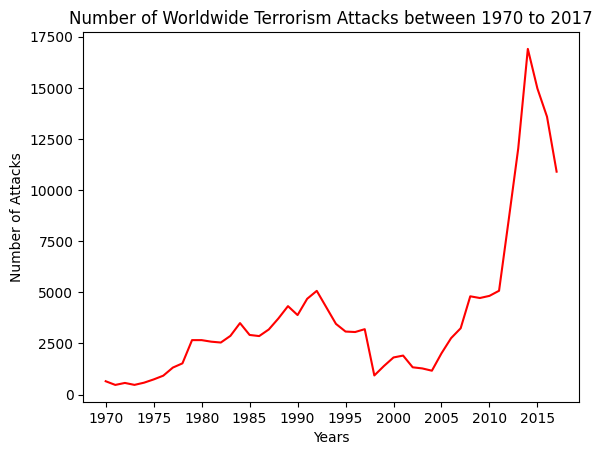

In [19]:
# Specify the desired interval positions and labels for the x-axis
x_ticks = range(1970, 2018, 5)
x_tick_labels = [str(x) for x in x_ticks]

sns.lineplot(x='iyear', y='count', data=attacks_year, color="red")
plt.xticks(x_ticks, x_tick_labels)  # Set the custom interval positions and labels
plt.xlabel('Years')
plt.ylabel('Number of Attacks')
plt.title('Number of Worldwide Terrorism Attacks between 1970 to 2017')
plt.show() #now I have a line graph with smaller intervals

In [17]:
attacks_year_region = slide1.groupby(['iyear', 'region_txt']).size().reset_index(name='count') #created variable for graph

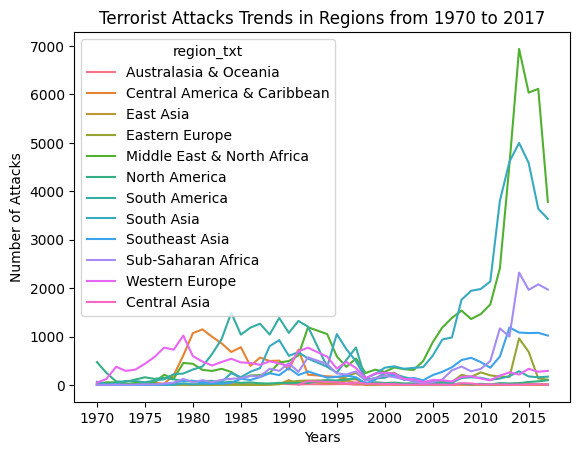

In [18]:
x_ticks = range(1970, 2018, 5)
x_tick_labels = [str(x) for x in x_ticks]

sns.lineplot(x='iyear', y='count',hue='region_txt', data=attacks_year_region )
plt.xticks(x_ticks, x_tick_labels) 
plt.title('Terrorist Attacks Trends in Regions from 1970 to 2017')
plt.xlabel('Years')
plt.ylabel('Number of Attacks')
plt.show()